# PRABIN LAMSAL
## CE
## TOPIC MODELING

In [ ]:
import gensim
from gensim import corpora, models, matutils
import matplotlib.pyplot as plt
import numpy as np
from os import path
from scipy.spatial import distance
import logging
from wordcloud import WordCloud

In [ ]:
if not path.exists('./data/ap/ap.dat'):
    print('Error: Expected data to be present at data/ap/')
    print('Please cd into ./data & run ./download_ap.sh')

In [ ]:
corpus = corpora.BleiCorpus('./data/ap/ap.dat', './data/ap/vocab.txt') 

In [ ]:
model = models.ldamodel.LdaModel(corpus,num_topics=100,id2word=corpus.id2word) 

In [ ]:
doc = corpus.docbyoffset(0)
topics = model[doc]
print(topics)

[(6, 0.016071824), (11, 0.06446511), (12, 0.028558876), (20, 0.013292106), (23, 0.011022827), (28, 0.32083482), (40, 0.27475992), (42, 0.04126963), (43, 0.014165783), (58, 0.011623456), (85, 0.016929395), (86, 0.09715283), (96, 0.013350881), (97, 0.058657724)]


In [ ]:
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)
weight = topics.sum(1)
max_topic = weight.argmax()

(array([170., 304., 651., 415., 321., 277.,  75.,  25.,   4.,   4.]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ]),
 <BarContainer object of 10 artists>)

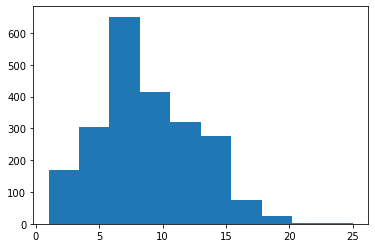

In [ ]:
num_topics_used = [len(model[doc]) for doc in corpus]
fig,ax = plt.subplots()
ax.hist(num_topics_used) 

In [ ]:
model = models.ldamodel.LdaModel(corpus,num_topics=100,id2word=corpus.id2word,alpha=1.0) 

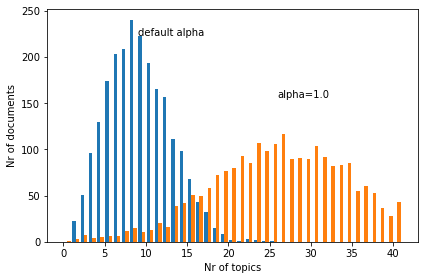

In [ ]:
num_topics_used1 = [len(model[doc]) for doc in corpus]

fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')

# The coordinates below were fit by trial and error to look good
ax.text(9, 223, r'default alpha')
ax.text(26, 156, 'alpha=1.0')
fig.tight_layout()

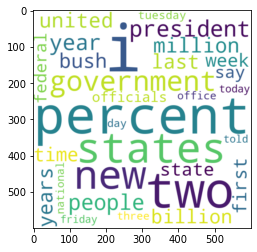

In [ ]:
weights = topics.sum(axis=0)
words = model.show_topic(max_topic, 64)

wc = WordCloud(background_color='white', max_words=30, width=600, height=600)
wc = wc.generate_from_frequencies(dict(words))

fig,ax = plt.subplots()

ax.imshow(wc, interpolation="bilinear")

### Comparing documents by topic

In [ ]:
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)
weight = topics.sum(1)
max_topic = weight.argmax()
words = model.show_topic(max_topic, 64)

In [ ]:
distances = distance.squareform(distance.pdist(topics)) 

In [ ]:
for ti in range(len(topics)):
 distances[ti,ti] = np.inf

In [ ]:
def closest_to(doc_id):
 return distances[doc_id].argmin() 

In [ ]:
closest_to(1)

82

### Modeling the whole of Wikipedia

In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
id2word = gensim.corpora.Dictionary.load_from_text(
 './data/wiki_en_output_wordids.txt')
mm = gensim.corpora.MmCorpus('./data/wiki_en_output_tfidf.mm') 

2022-08-03 18:18:31,101 : INFO : loaded corpus index from ./data/wiki_en_output_tfidf.mm.index
2022-08-03 18:18:31,101 : INFO : initializing cython corpus reader from ./data/wiki_en_output_tfidf.mm
2022-08-03 18:18:31,102 : INFO : accepted corpus with 5256005 documents, 100000 features, 852265852 non-zero entries


In [ ]:
model1 = gensim.models.ldamodel.LdaModel.load('wiki_lda.pkl') 
topics = np.load('topics.npy', mmap_mode='r')

2022-08-03 18:18:31,163 : INFO : loading LdaModel object from wiki_lda.pkl
2022-08-03 18:18:31,164 : INFO : loading expElogbeta from wiki_lda.pkl.expElogbeta.npy with mmap=None
2022-08-03 18:18:31,181 : INFO : setting ignored attribute state to None
2022-08-03 18:18:31,182 : INFO : setting ignored attribute dispatcher to None
2022-08-03 18:18:31,183 : INFO : setting ignored attribute id2word to None
2022-08-03 18:18:31,183 : INFO : LdaModel lifecycle event {'fname': 'wiki_lda.pkl', 'datetime': '2022-08-03T18:18:31.183763', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'loaded'}
2022-08-03 18:18:31,184 : INFO : loading LdaState object from wiki_lda.pkl.state
2022-08-03 18:18:31,201 : INFO : LdaState lifecycle event {'fname': 'wiki_lda.pkl.state', 'datetime': '2022-08-03T18:18:31.201763', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'pla

In [ ]:
lens = (topics > 0).sum(axis=1)
print('Mean number of topics mentioned: {0:.4}'.format(np.mean(lens)))
print('Percentage of articles mentioning <10 topics: {0:.1%}'.format(
 np.mean(lens <= 10))) 

Mean number of topics mentioned: 3.46
Percentage of articles mentioning <10 topics: 100.0%


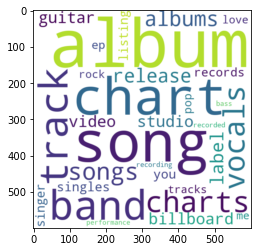

In [ ]:
weights = topics.sum(axis=0)
words = model1.show_topic(weights.argmax(), 64)

wc = WordCloud(background_color='white', max_words=30, width=600, height=600)
wc = wc.generate_from_frequencies(dict(words))

fig,ax = plt.subplots()

ax.imshow(wc, interpolation="bilinear")

In [ ]:
fraction_mention = np.mean(topics[:,weights.argmax()] > 0)
print("The most mentioned topics is mentioned in {:.1%} of documents.".format(fraction_mention))
total_weight = np.mean(topics[:,weights.argmax()])
print("It represents {:.1%} of the total number of words.".format(total_weight))

The most mentioned topics is mentioned in 8.4% of documents.
It represents 4.3% of the total number of words.


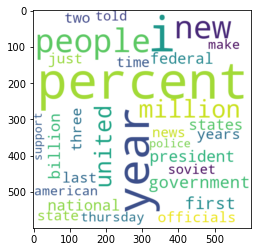

In [ ]:
words = model.show_topic(weights.argmin(), 64)

wc = WordCloud(background_color='white', max_words=30, width=600, height=600)
wc = wc.generate_from_frequencies(dict(words))
fig,ax = plt.subplots()

ax.imshow(wc, interpolation="bilinear")

In [ ]:
fraction_mention = np.mean(topics[:,weights.argmin()] > 0)
print("The least mentioned topics is mentioned in {:.1%} of documents.".format(fraction_mention))
total_weight = np.mean(topics[:,weights.argmin()])
print("It represents {:.1%} of the total number of words.".format(total_weight))

The least mentioned topics is mentioned in 0.7% of documents.
It represents 0.0% of the total number of words.
